# 10 m resolution

In [81]:
import rasterio
from rasterio.plot import show
from rasterio.windows import Window
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

In [82]:
b2 = rasterio.open('../S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE/GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B02_10m.jp2')
row, col = b2.index(601200.0, 5773695.0)
B2 = np.empty((500, 700, b2.count), b2.meta['dtype'])
B2[:,:,0] =  b2.read(1, window=Window(row_off = row, col_off=col, width=700, height=500,))

b3 = rasterio.open('../S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE/GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B03_10m.jp2')
row, col = b3.index(601200.0, 5773695.0)
B3 = np.empty((500, 700, b3.count), b3.meta['dtype'])
B3[:,:,0] =  b3.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

b4 = rasterio.open('../S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE/GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B04_10m.jp2')
row, col = b4.index(601200.0, 5773695.0)
B4 = np.empty((500, 700, b4.count), b4.meta['dtype'])
B4[:,:,0] =  b4.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))

b8 = rasterio.open('../S2A_MSIL2A_20200530T105031_N0214_R051_T31UET_20200530T134211.SAFE/GRANULE/L2A_T31UET_A025788_20200530T105134/IMG_DATA/R10m/T31UET_20200530T105031_B08_10m.jp2')
row, col = b8.index(601200.0, 5773695.0)
B8 = np.empty((500, 700, b8.count), b8.meta['dtype'])
B8[:,:,0] =  b8.read(1, window=Window(row_off = row, col_off=col, height=500, width=700))


all_bands = np.dstack((B2, B3, B4, B8))

all_bands_1d = all_bands[:,:,:].reshape((all_bands.shape[0]*all_bands.shape[1],all_bands.shape[2]))

The below plot shows the values of the different bands seperately. The max dimention of the colorbar is set at 12000, because the highest max of a band is 11112. As can be seen, the values of band 8 differ much from the other bands. 

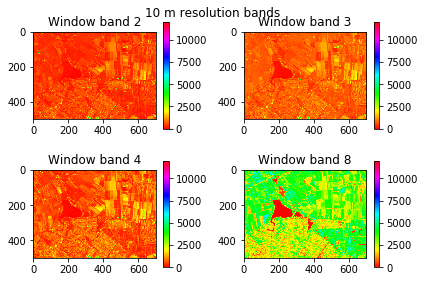

In [83]:
fig = plt.figure()
fig.suptitle("10 m resolution bands")
ax1 = fig.add_subplot(221)
im = ax1.imshow(all_bands[:,:,0], cmap='hsv')
im.set_clim(0, 12000)
ax1.set_title('Window band 2')
fig.colorbar(im, ax=ax1)

ax2 = fig.add_subplot(222)
im = ax2.imshow(all_bands[:,:,1], cmap='hsv')
im.set_clim(0, 12000)
ax2.set_title('Window band 3')
fig.colorbar(im, ax=ax2)

ax3 = fig.add_subplot(223)
im = ax3.imshow(all_bands[:,:,2], cmap='hsv')
im.set_clim(0, 12000)
ax3.set_title('Window band 4')
fig.colorbar(im, ax=ax3)

ax4 = fig.add_subplot(224)
im = ax4.imshow(all_bands[:,:,3], cmap='hsv')
im.set_clim(0, 12000)
ax4.set_title('Window band 8')
fig.colorbar(im, ax=ax4)

fig.tight_layout()
plt.show()

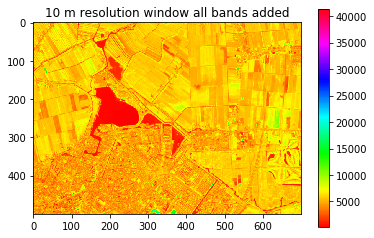

In [84]:
plt.figure()
plt.title("10 m resolution window all bands added")
plt.imshow((all_bands[:,:,0]+all_bands[:,:,1]+all_bands[:,:,2]+all_bands[:,:,3]), cmap='hsv')
plt.colorbar()
plt.show()

In [106]:
clusterlist = []
for i in range(3, 13):
    cl = cluster.KMeans(init='random', n_clusters=i)
    param = cl.fit(all_bands_1d) 
    img_cl = cl.labels_ 
    img_cl = img_cl.reshape(all_bands[:,:,0].shape) 
    clusterlist.append(img_cl)

As can be seen from the plot below, there is a big difference in the number of clusters used. However, at te larger cluster numbers the differences become smaller. 

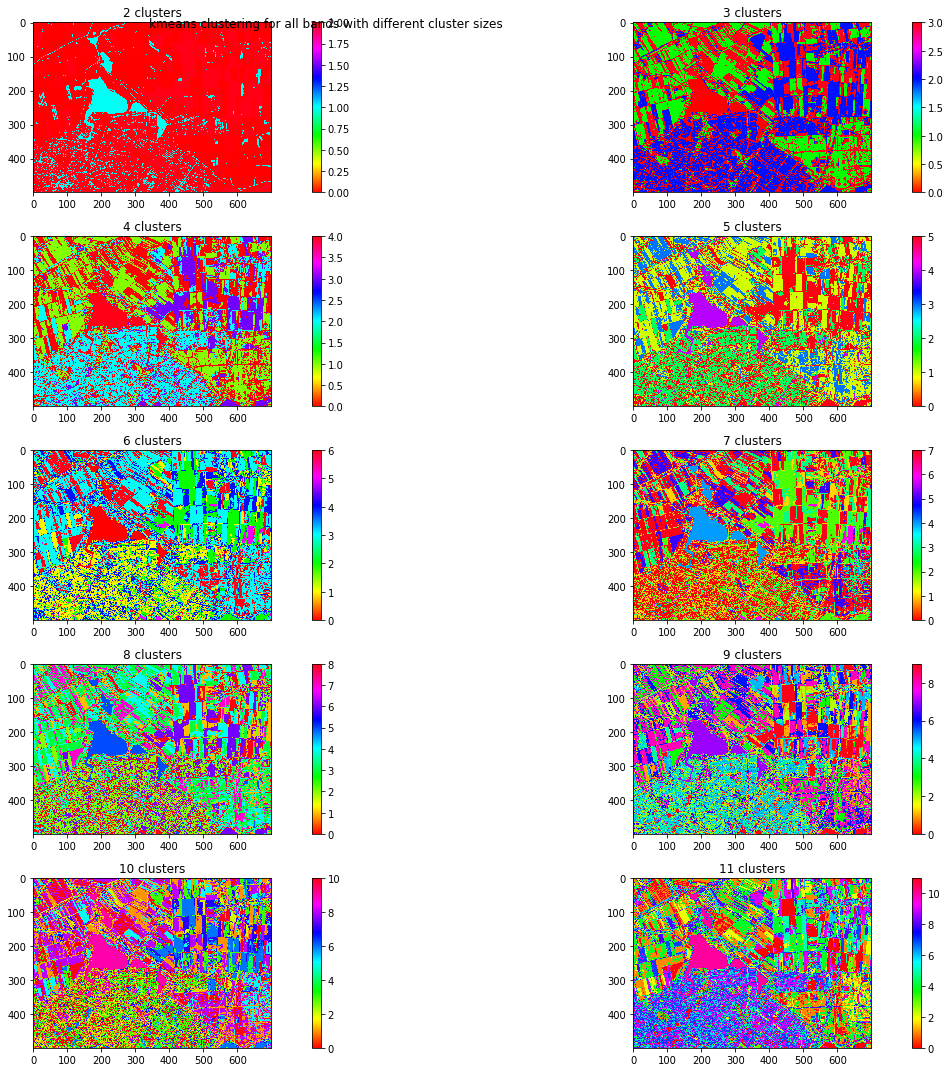

In [108]:
fig, axs = plt.subplots(5, 2, figsize=[20,15])
axs = axs.ravel()
fig.suptitle("kmeans clustering for all bands with different cluster sizes")

for i in range(len(clusterlist)):
    im = axs[i].imshow(clusterlist[i], cmap='hsv')
    axs[i].set_title(f'{i+2} clusters')
    fig.colorbar(im, ax=axs[i])

fig.tight_layout()
plt.show()